| <h1><b>Pengenalan Xarray</b></h1> |  ![](files/piksel-logo-small.png) |
|:---------|----------:|

* **Kompatibilitas**: Notebook saat ini kompatibel dengan lingkungan `Piksel Sandbox`
* **Prasyarat**:  Pengguna notebook ini harus memiliki pemahaman dasar tentang:
    * Bagaimana menjalankan [Jupyter notebook](02_Jupyter_notebook.ipynb)
    * Bagaimana menggunakan [Numpy](07_Numpy.ipynb)

## 🔙 Pendahuluan
`Xarray` adalah pustaka python yang menyederhanakan pekerjaan dengan array multi-dimensi berlabel.
`Xarray` memperkenalkan label dalam bentuk dimensi, koordinat, dan atribut di atas array `numpy` mentah, yang memungkinkan pengembangan yang lebih intuitif dan ringkas.
Informasi lebih lanjut tentang struktur dan fungsi data `xarray` dapat ditemukan [di sini](http://xarray.pydata.org/en/stable/).

Setelah Anda menyelesaikan buku catatan ini, Anda mungkin tertarik untuk mengembangkan kemampuan `xarray` Anda lebih jauh, [notebook eksternal](https://rabernat.github.io/research_computing/xarray.html) ini memperkenalkan lebih banyak penggunaan `xarray` dan dapat membantu Anda mengembangkan kemampuan Anda lebih jauh. 

Buku catatan ini dirancang untuk memperkenalkan pengguna kepada `xarray` menggunakan kode Python di Jupyter Notebooks melalui JupyterLab.

Topik-topik yang dibahas meliputi:

* Cara menggunakan fungsi `xarray` dalam sel Jupyter Notebook
* Cara mengakses dimensi dan metadata `xarray`
* Menggunakan pengindeksan untuk menjelajahi data `xarray` multi-dimensi
* Penerapan fungsi `xarray` bawaan seperti sum, std, dan mean

## 🏃‍♂️‍➡️ Memulai
Untuk menjalankan notebook ini, jalankan semua sel dalam notebook yang dimulai dengan sel "Load packages". Untuk bantuan dalam menjalankan sel notebook, lihat kembali ke [Jupyter Notebooks notebook](02_Jupyter_notebook.ipynb). 

### Menggunakan Library

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## 📅 Pengantar xarray
Piksel menggunakan `xarray` sebagai model data intinya. 
Untuk lebih memahami apa itu, pertama-tama mari kita lakukan percobaan sederhana menggunakan kombinasi array `numpy` biasa dan kamus Python.

Misalkan kita memiliki citra satelit dengan tiga band: `Red`, `NIR`, dan `SWIR`.
Band-band ini direpresentasikan sebagai array `numpy` 2 dimensi dan koordinat lintang dan bujur untuk setiap dimensi direpresentasikan menggunakan array 1 dimensi. 
Terakhir, kami juga memiliki beberapa metadata yang disertakan dengan gambar ini.
Kode di bawah ini membuat data satelit palsu dan menyusun data tersebut sebagai `dictionary`.

In [2]:
# Membuat data satelit palsu
red = np.random.rand(250, 250)
nir = np.random.rand(250, 250)
swir = np.random.rand(250, 250)

# Buat beberapa lintang dan bujur
lats = np.linspace(-23.5, -26.0, num=red.shape[0], endpoint=False)
lons = np.linspace(110.0, 112.5, num=red.shape[1], endpoint=False)

# Buat metadata
title = "Image of the desert"
date = "2019-11-10"

# Tumpuk ke dalam dictionary
image = {
    "red": red,
    "nir": nir,
    "swir": swir,
    "latitude": lats,
    "longitude": lons,
    "title": title,
    "date": date,
}

Semua data dikemas dengan mudah dalam dictionary. Sekarang kita dapat menggunakan dictionary ini untuk bekerja dengan data yang ada di dalamnya:

In [3]:
# Tanggal citra satelit
print(image["date"])

# Rata-rata nilai red
image["red"].mean()

2019-11-10


np.float64(0.4995930484192228)

Namun demikian, untuk memilih data, kita harus menggunakan indeks `numpy`.
Bukankah akan lebih mudah jika kita dapat memilih data dari gambar dengan menggunakan koordinat piksel, bukan posisi relatifnya?
Inilah yang diselesaikan oleh `xarray`! Mari kita lihat bagaimana cara kerjanya:

Untuk menjelajahi `xarray` kita memiliki file yang berisi beberapa data reflektansi permukaan yang diekstrak dari platform Piksel.
Objek yang kita dapatkan `ds` adalah `xarray` `Dataset`, yang dalam beberapa hal sangat mirip dengan dictionary yang telah kita buat sebelumnya, tetapi dengan banyak fungsi yang tersedia.

In [4]:
ds = xr.open_dataset("files/example_netcdf.nc")
ds

<xarray.Dataset> Size: 21MB
Dimensions:      (time: 12, y: 601, x: 483)
Coordinates:
  * time         (time) datetime64[ns] 96B 2018-01-03T08:31:05 ... 2018-02-27...
  * y            (y) float64 5kB -2.519e+06 -2.519e+06 ... -2.507e+06 -2.507e+06
  * x            (x) float64 4kB 2.378e+06 2.378e+06 ... 2.388e+06 2.388e+06
    spatial_ref  int32 4B ...
Data variables:
    red          (time, y, x) uint16 7MB ...
    green        (time, y, x) uint16 7MB ...
    blue         (time, y, x) uint16 7MB ...
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

### Struktur kumpulan data Xarray
Sebuah `Dataset` dapat dilihat sebagai struktur dictionary yang mengemas data, dimensi, dan atribut. Variabel dalam objek `Dataset` disebut `DataArrays` dan mereka berbagi dimensi dengan `Dataset` yang lebih tinggi.
Gambar di bawah ini memberikan contoh ilustrasi:

![Xarray img](files/dataset-diagram.png)


Untuk mengakses sebuah variabel, kita bisa mengaksesnya seolah-olah seperti kamus Python, atau menggunakan notasi `.`, yang lebih nyaman.

In [5]:
ds["green"]

# Atau sebagai alternatif:
ds.green

<xarray.DataArray 'green' (time: 12, y: 601, x: 483)> Size: 7MB
[3483396 values with dtype=uint16]
Coordinates:
  * time         (time) datetime64[ns] 96B 2018-01-03T08:31:05 ... 2018-02-27...
  * y            (y) float64 5kB -2.519e+06 -2.519e+06 ... -2.507e+06 -2.507e+06
  * x            (x) float64 4kB 2.378e+06 2.378e+06 ... 2.388e+06 2.388e+06
    spatial_ref  int32 4B ...
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

Dimensi juga disimpan sebagai array numerik yang dapat dengan mudah kita akses:

In [6]:
ds["time"]

# Atau sebagai alternatif:
ds.time

<xarray.DataArray 'time' (time: 12)> Size: 96B
array(['2018-01-03T08:31:05.000000000', '2018-01-08T08:34:01.000000000',
       '2018-01-13T08:30:41.000000000', '2018-01-18T08:30:42.000000000',
       '2018-01-23T08:33:58.000000000', '2018-01-28T08:30:20.000000000',
       '2018-02-07T08:30:53.000000000', '2018-02-12T08:31:43.000000000',
       '2018-02-17T08:23:09.000000000', '2018-02-17T08:35:40.000000000',
       '2018-02-22T08:34:52.000000000', '2018-02-27T08:31:36.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 96B 2018-01-03T08:31:05 ... 2018-02-27...
    spatial_ref  int32 4B ...

Metadata disebut sebagai atribut dan disimpan secara internal di bawah `.attrs`, tetapi notasi `.` yang sama juga berlaku untuk metadata.

In [7]:
ds.attrs["crs"]

# Atau sebagai alternatif:
ds.crs

'EPSG:6933'

`DataArrays` menyimpan datanya secara internal sebagai array `numpy` multidimensi.
Namun array ini berisi dimensi atau label yang memudahkan penanganan data.
Untuk mengakses array numpy yang mendasari sebuah `DataArray`, kita dapat menggunakan notasi `.values`.

In [8]:
arr = ds.green.values

type(arr), arr.shape

(numpy.ndarray, (12, 601, 483))

### Pengindeksan

`Xarray` menawarkan dua cara yang berbeda untuk memilih data. Ini termasuk pendekatan `isel()`, di mana data dapat dipilih berdasarkan indeksnya (seperti `numpy`).


In [9]:
print(ds.time.values)

ss = ds.green.isel(time=0)
ss

['2018-01-03T08:31:05.000000000' '2018-01-08T08:34:01.000000000'
 '2018-01-13T08:30:41.000000000' '2018-01-18T08:30:42.000000000'
 '2018-01-23T08:33:58.000000000' '2018-01-28T08:30:20.000000000'
 '2018-02-07T08:30:53.000000000' '2018-02-12T08:31:43.000000000'
 '2018-02-17T08:23:09.000000000' '2018-02-17T08:35:40.000000000'
 '2018-02-22T08:34:52.000000000' '2018-02-27T08:31:36.000000000']


<xarray.DataArray 'green' (y: 601, x: 483)> Size: 581kB
array([[1214, 1232, 1406, ..., 3436, 4252, 4300],
       [1214, 1334, 1378, ..., 2006, 2602, 4184],
       [1274, 1340, 1554, ..., 2436, 1858, 1890],
       ...,
       [1142, 1086, 1202, ..., 1096, 1074, 1092],
       [1188, 1258, 1190, ..., 1058, 1138, 1138],
       [1152, 1134, 1074, ..., 1086, 1116, 1100]],
      shape=(601, 483), dtype=uint16)
Coordinates:
    time         datetime64[ns] 8B 2018-01-03T08:31:05
  * y            (y) float64 5kB -2.519e+06 -2.519e+06 ... -2.507e+06 -2.507e+06
  * x            (x) float64 4kB 2.378e+06 2.378e+06 ... 2.388e+06 2.388e+06
    spatial_ref  int32 4B ...
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

Atau pendekatan `sel()`, yang digunakan untuk memilih data berdasarkan dimensi nilai labelnya.

In [10]:
ss = ds.green.sel(time="2018-01-08")
ss

<xarray.DataArray 'green' (time: 1, y: 601, x: 483)> Size: 581kB
array([[[1270, 1280, ..., 4228, 3950],
        [1266, 1332, ..., 3880, 4372],
        ...,
        [1172, 1180, ..., 1154, 1190],
        [1242, 1204, ..., 1192, 1170]]], shape=(1, 601, 483), dtype=uint16)
Coordinates:
  * time         (time) datetime64[ns] 8B 2018-01-08T08:34:01
  * y            (y) float64 5kB -2.519e+06 -2.519e+06 ... -2.507e+06 -2.507e+06
  * x            (x) float64 4kB 2.378e+06 2.378e+06 ... 2.388e+06 2.388e+06
    spatial_ref  int32 4B ...
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

Mengiris data juga digunakan untuk memilih sebagian data.

In [11]:
ss.x.values[100]

np.float64(2380390.0)

In [12]:
ss = ds.green.sel(time="2018-01-08", x=slice(2378390, 2380390))
ss

<xarray.DataArray 'green' (time: 1, y: 601, x: 101)> Size: 121kB
array([[[1270, 1280, ..., 1416, 1290],
        [1266, 1332, ..., 1368, 1274],
        ...,
        [1172, 1180, ..., 1086,  991],
        [1242, 1204, ..., 1019,  986]]], shape=(1, 601, 101), dtype=uint16)
Coordinates:
  * time         (time) datetime64[ns] 8B 2018-01-08T08:34:01
  * y            (y) float64 5kB -2.519e+06 -2.519e+06 ... -2.507e+06 -2.507e+06
  * x            (x) float64 808B 2.378e+06 2.378e+06 ... 2.38e+06 2.38e+06
    spatial_ref  int32 4B ...
Attributes:
    units:         1
    nodata:        0
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

Xarray menyediakan banyak fungsi untuk mengubah dan menganalisis `Dataset` dan `DataArray` dengan mudah.
Sebagai contoh, untuk menghitung rata-rata spasial, deviasi standar, atau jumlah band hijau:

In [11]:
print("Mean of green band:", ds.green.mean().values)
print("Standard deviation of green band:", ds.green.std().values)
print("Sum of green band:", ds.green.sum().values)

Mean of green band: 4141.488778766468
Standard deviation of green band: 3775.5536474649584
Sum of green band: 14426445446


## 🖨️ Memplot data dengan Matplotlib
Plotting juga terintegrasi dengan mudah dalam library.

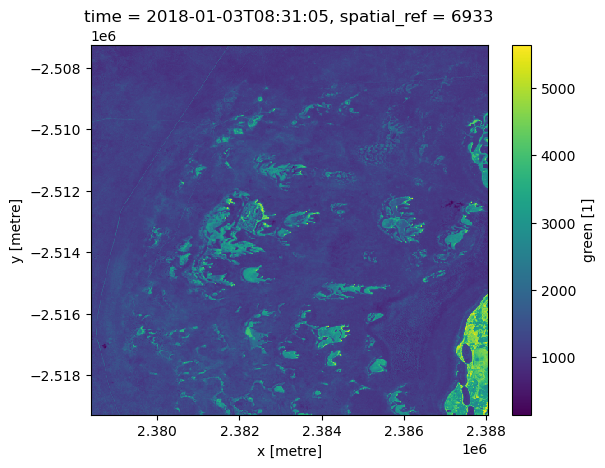

In [12]:
ds["green"].isel(time=0).plot()

... tetapi kita masih dapat melakukan berbagai hal secara manual menggunakan `numpy` dan `matplotlib` jika Anda mau:

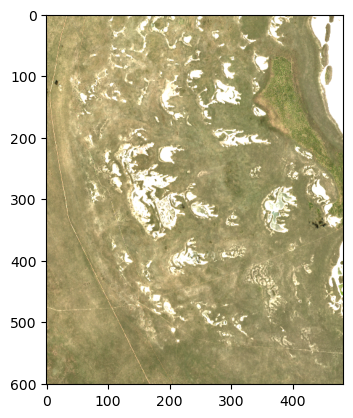

In [13]:
rgb = np.dstack((ds.red.isel(time=0).values,
                 ds.green.isel(time=0).values,
                 ds.blue.isel(time=0).values))
rgb = np.clip(rgb, 0, 2000) / 2000

plt.imshow(rgb);

Tetapi bandingkan dengan operasi perangkaian yang elegan dalam `xarray`:

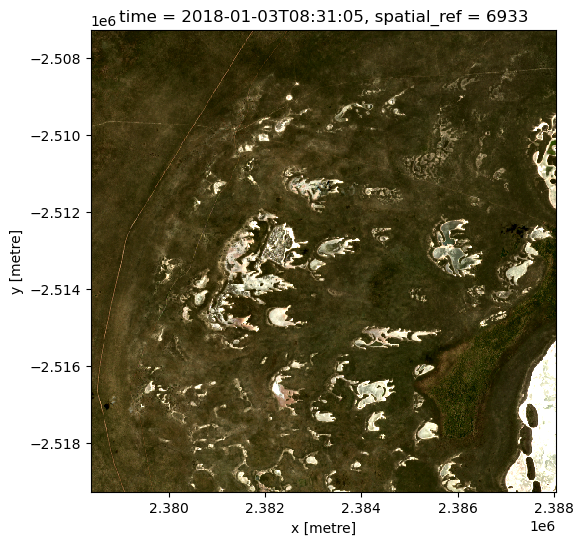

In [14]:
ds[["red", "green", "blue"]].isel(time=0).to_array().plot.imshow(robust=True, figsize=(6, 6));

---

## ℹ️ Info

Jika ada pertanyaan atau komentar bisa mengirimkan email ke piksel@big.go.id

**Lisensi:** Skrip dalam notebook ini dilisensikan berdasarkan [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Data Piksel dilisensikan berdasarkan lisensi [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/).  


In [1]:
from datetime import datetime
print(f"Tanggal update: {datetime.now().strftime('%d %B %Y')}")

Tanggal update: 04 August 2025
